## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from subprocess import check_output
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(check_output(["ls", "../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/"]).decode("utf8"))

CV_Project2_Dog_Breed_Classification_Questions-2.ipynb
labels.csv
sample_submission.csv
test
train
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5



Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

Repeat the same step for test.zip

Repeat the same step for sample_submission.csv.zip

Repeat the same step for labels.csv.zip

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels_data = pd.read_csv(project_path + "labels.csv")
labels_data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,95cafdd4b2f6be2ba46c472c2dedb98f,scottish_deerhound
freq,1,126


### Print the count of each category of Dogs given in the dataset



In [0]:
dog_category = labels_data.groupby("breed").count()
dog_category.columns = ["Count"]
dog_category

,Count
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
appenzeller,78
australian_terrier,102
basenji,110
basset,82


### Get one-hot encodings of labels

In [0]:
import tensorflow as tf

In [0]:
#Converting Categorical Values to One Hot Encoded Format, dropping redundant first dummy variable for decorrelation
labels_data_encoded = pd.get_dummies(labels_data, columns = ["breed"], dtype = np.int64)
labels_data_encoded = labels_data_encoded.loc[:,labels_data_encoded.columns != "id"]

In [0]:
labels_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Columns: 120 entries, breed_affenpinscher to breed_yorkshire_terrier
dtypes: int64(120)
memory usage: 9.4 MB


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import os, sys
train_folder = "../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/train"
test_folder = "../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/test"

In [0]:
IMG_SIZE = 64
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
            images.append(filename)
    return images

In [0]:
train_files = load_images_from_folder(train_folder)
test_files = load_images_from_folder(test_folder)

In [0]:
#Optimizing Code through Sorting prior to Searching
train_files.sort()
test_files.sort()
labels_data.sort_values(by = 'id', inplace = True)

In [0]:
#Deleting garbage data
del train_files[0]
del test_files[0]

In [0]:
train_files_X = []
train_files_Y = []
for index, i in enumerate(labels_data.id):
    for j in train_files:
        if(i in j):
            train_files_X.append(i + '.jpg')
            train_files_Y.append(labels_data_encoded.iloc[index, :])

In [0]:
train_files_X = pd.DataFrame(train_files_X)
train_files_Y = pd.DataFrame(train_files_Y)

In [0]:
train_files_X.head()

,0
0,001513dfcb2ffafc82cccf4d8bbaba97.jpg
1,001cdf01b096e06d78e9e5112d419397.jpg
2,00214f311d5d2247d5dfe4fe24b2303d.jpg
3,0021f9ceb3235effd7fcde7f7538ed62.jpg
4,002211c81b498ef88e1b40b9abf84e1d.jpg


In [0]:
train_files_X.describe()

,0
count,10075
unique,10075
top,ffa0055ec324829882186bae29491645.jpg
freq,1


In [0]:
train_files_Y.head()

,breed_affenpinscher,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,breed_english_foxhound,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_files_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10075 entries, 1 to 10221
Columns: 120 entries, breed_affenpinscher to breed_yorkshire_terrier
dtypes: int64(120)
memory usage: 9.3 MB


Train Image Example: 



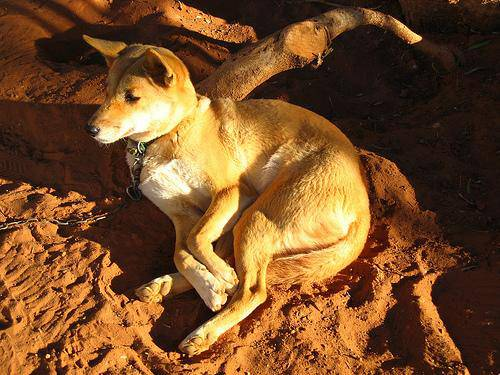

In [0]:
from IPython.display import display
from IPython.display import Image as _Imgdis
print("Train Image Example: \n")
display(_Imgdis(filename=train_folder + "/" + train_files_X.iloc[0,0], width=240, height=320))

In [0]:
from PIL import Image
import numpy as np
from time import time
from time import sleep
from random import shuffle
import cv2
import glob
def load_train(path, image_list, size):
    images=[]
    labels=[]
    ids=[]
    clas=[]
    files = glob.glob(path+'/*')
    for index, f1 in enumerate(image_list):
      if(index%4 == 0):
        im=cv2.imread(path + '/' + f1)
        image = cv2.resize(im, (size, size), cv2.INTER_LINEAR)
        images.append(image)
        labels.append(train_files_Y.iloc[index, :])
        if(index == 5000):
          break
    images = np.array(images)
    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)
    print("Done Loading")
    return images, pd.DataFrame(labels)


In [0]:
print("Image Size: ", IMG_SIZE)
X, Y = load_train(train_folder, train_files_X.iloc[:,0], IMG_SIZE)

Image Size:  64
Done Loading


In [0]:
print(X[0])
Y.head(3)

[[[0.07450981 0.12156864 0.21176472]
  [0.07843138 0.15294118 0.28627452]
  [0.10588236 0.20000002 0.3647059 ]
  ...
  [0.00784314 0.0509804  0.18039216]
  [0.09411766 0.18039216 0.3137255 ]
  [0.0509804  0.12156864 0.23529413]]

 [[0.01960784 0.10196079 0.23529413]
  [0.07450981 0.12941177 0.22352943]
  [0.1137255  0.11764707 0.21568629]
  ...
  [0.0627451  0.12156864 0.21176472]
  [0.01960784 0.07843138 0.16470589]
  [0.04313726 0.08235294 0.16078432]]

 [[0.03137255 0.14117648 0.3019608 ]
  [0.09019608 0.19215688 0.36078432]
  [0.0627451  0.18431373 0.37254903]
  ...
  [0.04313726 0.07450981 0.14509805]
  [0.0627451  0.09411766 0.14509805]
  [0.03529412 0.06666667 0.10980393]]

 ...

 [[0.20392159 0.4784314  0.76470596]
  [0.26666668 0.52156866 0.854902  ]
  [0.27450982 0.6117647  0.96470594]
  ...
  [0.02352941 0.05490196 0.16862746]
  [0.00784314 0.0627451  0.21960786]
  [0.03921569 0.08627451 0.19607845]]

 [[0.17254902 0.43529415 0.70980394]
  [0.25882354 0.5254902  0.8705883 ]


,breed_affenpinscher,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,breed_english_foxhound,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Data is normalized and 4D
print(X.shape)

(1251, 64, 64, 3)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state = 7, shuffle = True)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(938, 64, 64, 3) (313, 64, 64, 3) (938, 120) (313, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
data_sample_submission = pd.read_csv("../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/sample_submission.csv")

In [0]:
test_img = data_sample_submission.id

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for index, f in enumerate(test_img.values): # f for format ,jpg
  if(index%4 == 0):
    img = cv2.imread('../content/gdrive/My Drive/Colab Notebooks/Project 2 | Computer Vision With CNN/test/{}.jpg'.format(f))
    if(img is None):
      continue
    img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE), cv2.INTER_LINEAR)
    x_test_feature.append(img_resize)
    if(index == 2000):
      print("Done Loading")
      break
x_test_feature = np.array(x_test_feature)
x_test_feature = x_test_feature.astype(np.float32)
x_test_feature = np.multiply(x_test_feature, 1.0 / 255.0)

Done Loading


Normalize the test data and convert it into 4 dimensions

In [0]:
#Data is normalized and 4D
print(x_test_feature.shape)

(448, 64, 64, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
model_simple_conv = Sequential()

model_simple_conv.add(Conv2D(32, kernel_size = (5, 5), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(256, activation='relu'))
model_simple_conv.add(Dropout(0.5))
model_simple_conv.add(Dense(120, activation='softmax'))

model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
output_simple_conv = model_simple_conv.fit(x_train, y_train, batch_size = 128,
                                           epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 938 samples, validate on 313 samples
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 5.7479 - acc: 0.0149 - val_loss: 4.9493 - val_acc: 0.0192
Epoch 2/10
938/938 [==============================] - 0s 203us/step - loss: 4.4940 - acc: 0.0650 - val_loss: 4.9567 - val_acc: 0.0064
Epoch 3/10
938/938 [==============================] - 0s 212us/step - loss: 4.1573 - acc: 0.0949 - val_loss: 5.0120 - val_acc: 0.0192
Epoch 4/10
938/938 [==============================] - 0s 213us/step - loss: 3.6211 - acc: 0.1812 - val_loss: 5.0330 - val_acc: 0.0064
Epoch 5/10
938/938 [==============================] - 0s 200us/step - loss: 3.1979 - acc: 0.2527 - val_loss: 5.2825 - val_acc: 0.0224
Epoch 6/10
938/938 [==============================] - 0s 203us/step - loss: 2.7053 - acc: 0.3646 - val_loss: 5.6626 - val_acc: 0.0192
Epoch 7/10
938/938 [==============================] - 0s 213us/step - loss: 2.2301 - acc: 0.4563 - val_l

In [0]:
#Extremely Poor Validation Accuracy

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#Attempting to use Data Augmentation
datagen = ImageDataGenerator(samplewise_center=False, # set input mean to 0 over the sample
                          samplewise_std_normalization=False,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

In [0]:
# Set up the generator
datagen.fit(x_train)
callback = [EarlyStopping(monitor='val_loss', patience = 5)]

In [0]:
model_data_augment = Sequential()

model_data_augment.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Flatten())
model_data_augment.add(Dense(128, activation='relu'))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(Dense(120, activation='softmax'))

In [0]:
model_data_augment.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_3 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
__________

In [0]:
model_data_augment.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(x_train, y_train, batch_size = 128)
val_generator = datagen.flow(x_test, y_test, batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
train_history = model_data_augment.fit_generator(train_generator, steps_per_epoch=len(x_train) / 96 , 
                                                 use_multiprocessing = True, epochs = 3, callbacks = callback)

Epoch 1/3
10/9 [==============================] - 1s 144ms/step - loss: 5.1847 - acc: 0.0139
Epoch 2/3
2/9 [=====>........................] - ETA: 0s - loss: 4.8627 - acc: 0.0117    

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/9 [==============================] - 1s 110ms/step - loss: 4.7658 - acc: 0.0274
Epoch 3/3
10/9 [==============================] - 1s 124ms/step - loss: 4.6616 - acc: 0.0361


In [0]:
test_history = model_data_augment.fit_generator(val_generator, steps_per_epoch=len(x_test) / 64 , 
                                                 use_multiprocessing = True, epochs = 3, callbacks = callback)

Epoch 1/3
5/4 [==============================] - 1s 145ms/step - loss: 4.9177 - acc: 0.0192
Epoch 2/3
2/4 [===========>..................] - ETA: 0s - loss: 4.8540 - acc: 0.0205

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5/4 [==============================] - 1s 106ms/step - loss: 4.6548 - acc: 0.0604
Epoch 3/3
5/4 [==============================] - 1s 105ms/step - loss: 4.5481 - acc: 0.0491


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

Print the summary of the base_model

In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Adding custom Layers 
last = base_model.output
x = Flatten()(last)
x = Dropout(0.4)(x)
x = Dense(1024, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = Dropout(0.2)(x)
predictions = Dense(120, activation="softmax")(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
from keras.models import Sequential, Model

In [0]:
# creating the final model 
model_final = Model(input = base_model.input, output = predictions)

for layer in base_model.layers:
    layer.trainable = False

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer= keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# Save the model 
checkpoint = ModelCheckpoint("vgg16_best.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')

batch_size = 128
epochs = 10

# Train the model 
train_model_final = model_final.fit_generator(train_generator, steps_per_epoch=len(x_train) / 96 , use_multiprocessing = True, 
                          epochs = epochs, callbacks = [early])

Epoch 1/10
10/9 [==============================] - 4s 364ms/step - loss: 5.6340 - acc: 0.0109
Epoch 2/10
3/9 [========>.....................] - ETA: 0s - loss: 5.5267 - acc: 0.0078

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/9 [==============================] - 1s 58ms/step - loss: 5.5968 - acc: 0.0101
Epoch 3/10
10/9 [==============================] - 1s 115ms/step - loss: 5.5096 - acc: 0.0094
Epoch 4/10
10/9 [==============================] - 1s 123ms/step - loss: 5.4980 - acc: 0.0125
Epoch 5/10
10/9 [==============================] - 1s 135ms/step - loss: 5.4612 - acc: 0.0071
Epoch 6/10
10/9 [==============================] - 1s 132ms/step - loss: 5.5204 - acc: 0.0093
Epoch 7/10
10/9 [==============================] - 1s 132ms/step - loss: 5.5365 - acc: 0.0093
Epoch 8/10
10/9 [==============================] - 1s 124ms/step - loss: 5.4074 - acc: 0.0079
Epoch 9/10
10/9 [==============================] - 1s 133ms/step - loss: 5.4085 - acc: 0.0109
Epoch 10/10
10/9 [==============================] - 1s 132ms/step - loss: 5.3549 - acc: 0.0134


<tf.Tensor 'input_8:0' shape=(?, 96, 96, 3) dtype=float32>